In [ ]:
import numpy as np
import seaborn as snus
import pandas as pd
import matplotlib.pyplot as plt

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [ ]:
!wget https://www.dropbox.com/s/ay664fxtcgsis4a/COVID-19_Vaccinations_in_the_United_States_County.csv?dl=0 -O COVID-19_Vaccinations_in_the_United_States_County.csv

--2021-10-31 15:28:06--  https://www.dropbox.com/s/ay664fxtcgsis4a/COVID-19_Vaccinations_in_the_United_States_County.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ay664fxtcgsis4a/COVID-19_Vaccinations_in_the_United_States_County.csv [following]
--2021-10-31 15:28:06--  https://www.dropbox.com/s/raw/ay664fxtcgsis4a/COVID-19_Vaccinations_in_the_United_States_County.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce77fd517a258d64a2437e5f3dc.dl.dropboxusercontent.com/cd/0/inline/BZFmOHH8tHsQP4_SQUfC8M1tpUj0eU96NBy4sQqIhFePSIqbc-UHCYni929l0o9IjWvyYPSE8a4-_BE5Y_h-TaL2eAFSmXGZkKlw3DrNTD2m2mArxjHAhl2hqLJYgKGiqsetLCoIVQizC_CwDtqwiEgO/file# [following]
--2021-10-31 15:28:06--  https://uce77fd517a258d64a2437e5f3dc.

In [ ]:
data = pd.read_csv('/content/COVID-19_Vaccinations_in_the_United_States_County.csv')

In [ ]:
data

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,10/27/2021,17067,43.0,Hancock County,IL,40.7,7211.0,7209.0,47.0,6966.0,49.7,2956.0,70.9,97.8,8880.0,50.1,8877.0,57.9,8569.0,61.2,3723.0,89.3,A,3.0,3.0,3.0,4.0,Non-metro,7.0,7.0,7.0,8.0
1,10/27/2021,17187,43.0,Warren County,IL,42.8,7209.0,7203.0,49.9,6835.0,51.7,2599.0,76.5,97.8,8494.0,50.4,8483.0,58.8,8033.0,60.8,2889.0,85.0,C,11.0,11.0,12.0,12.0,Non-metro,7.0,7.0,8.0,8.0
2,10/27/2021,38043,43.0,Kidder County,ND,29.1,721.0,721.0,34.0,709.0,36.1,320.0,50.7,95.4,891.0,35.9,889.0,42.0,871.0,44.4,398.0,63.1,A,1.0,2.0,2.0,3.0,Non-metro,5.0,6.0,6.0,7.0
3,10/27/2021,21025,43.0,Breathitt County,KY,46.1,5827.0,5827.0,53.5,5468.0,54.7,1600.0,71.5,94.4,6580.0,52.1,6580.0,60.4,6160.0,61.6,1727.0,77.1,D,15.0,16.0,16.0,16.0,Non-metro,7.0,8.0,8.0,8.0
4,10/27/2021,39165,43.0,Warren County,OH,56.8,133367.0,133365.0,67.0,122476.0,68.9,30580.0,87.5,98.7,139453.0,59.4,139450.0,70.0,127613.0,71.7,31628.0,90.5,A,4.0,4.0,4.0,4.0,Metro,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808957,02/23/2021,27155,8.0,Traverse County,MN{,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
808958,"""error"" : true",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
808959,"""message"" : ""Internal error""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
808960,"""status"" : 500",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data = data.dropna()
data

,Date,FIPS,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Metro_status,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,10/27/2021,17067,43.0,Hancock County,IL,40.7,7211.0,7209.0,47.0,6966.0,49.7,2956.0,70.9,97.8,8880.0,50.1,8877.0,57.9,8569.0,61.2,3723.0,89.3,A,3.0,3.0,3.0,4.0,Non-metro,7.0,7.0,7.0,8.0
1,10/27/2021,17187,43.0,Warren County,IL,42.8,7209.0,7203.0,49.9,6835.0,51.7,2599.0,76.5,97.8,8494.0,50.4,8483.0,58.8,8033.0,60.8,2889.0,85.0,C,11.0,11.0,12.0,12.0,Non-metro,7.0,7.0,8.0,8.0
2,10/27/2021,38043,43.0,Kidder County,ND,29.1,721.0,721.0,34.0,709.0,36.1,320.0,50.7,95.4,891.0,35.9,889.0,42.0,871.0,44.4,398.0,63.1,A,1.0,2.0,2.0,3.0,Non-metro,5.0,6.0,6.0,7.0
3,10/27/2021,21025,43.0,Breathitt County,KY,46.1,5827.0,5827.0,53.5,5468.0,54.7,1600.0,71.5,94.4,6580.0,52.1,6580.0,60.4,6160.0,61.6,1727.0,77.1,D,15.0,16.0,16.0,16.0,Non-metro,7.0,8.0,8.0,8.0
4,10/27/2021,39165,43.0,Warren County,OH,56.8,133367.0,133365.0,67.0,122476.0,68.9,30580.0,87.5,98.7,139453.0,59.4,139450.0,70.0,127613.0,71.7,31628.0,90.5,A,4.0,4.0,4.0,4.0,Metro,4.0,4.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808950,02/23/2021,31105,8.0,Kimball County,NE,1.0,37.0,37.0,1.2,37.0,1.3,27.0,3.0,61.7,103.0,2.8,103.0,3.3,103.0,3.6,84.0,9.3,C,9.0,9.0,9.0,9.0,Non-metro,5.0,5.0,5.0,5.0
808951,02/23/2021,47179,8.0,Washington County,TN,11.7,15195.0,15195.0,13.4,15191.0,14.5,6744.0,27.8,98.3,23548.0,18.2,23548.0,20.7,23543.0,22.4,12337.0,50.8,B,5.0,5.0,5.0,5.0,Metro,1.0,1.0,1.0,1.0
808952,02/23/2021,47177,8.0,Warren County,TN,5.4,2217.0,2217.0,6.3,2217.0,7.0,1316.0,17.8,98.3,4396.0,10.6,4396.0,12.5,4396.0,13.9,2977.0,40.3,D,13.0,13.0,13.0,13.0,Non-metro,5.0,5.0,5.0,5.0
808955,02/23/2021,21097,8.0,Harrison County,KY,6.9,1300.0,1300.0,8.1,1300.0,8.9,465.0,13.6,94.9,2626.0,13.9,2626.0,16.3,2625.0,18.0,1411.0,41.4,C,9.0,9.0,9.0,9.0,Non-metro,5.0,5.0,5.0,5.0


In [ ]:
data = data.iloc[26001:26500]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 29292 to 29882
Data columns (total 32 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     499 non-null    object 
 1   FIPS                                     499 non-null    object 
 2   MMWR_week                                499 non-null    float64
 3   Recip_County                             499 non-null    object 
 4   Recip_State                              499 non-null    object 
 5   Series_Complete_Pop_Pct                  499 non-null    float64
 6   Series_Complete_Yes                      499 non-null    float64
 7   Series_Complete_12Plus                   499 non-null    float64
 8   Series_Complete_12PlusPop_Pct            499 non-null    float64
 9   Series_Complete_18Plus                   499 non-null    float64
 10  Series_Complete_18PlusPop_Pct            499

In [ ]:
# data['Date'].unique()
data = data.drop('Date', axis = 1)

In [ ]:
categorical_columns = ['FIPS','Recip_County', 'Recip_State', 'SVI_CTGY', 'Metro_status']
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
new_features = enc.fit_transform(data[categorical_columns])

In [ ]:
data = data.drop(categorical_columns, axis = 1)
new_data = pd.DataFrame(new_features, columns = categorical_columns)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FIPS          499 non-null    float64
 1   Recip_County  499 non-null    float64
 2   Recip_State   499 non-null    float64
 3   SVI_CTGY      499 non-null    float64
 4   Metro_status  499 non-null    float64
dtypes: float64(5)
memory usage: 19.6 KB


In [ ]:
data = data.reset_index()

In [ ]:
new_data = pd.concat([new_data, data], axis=1).drop('index', axis = 1)
new_data

,FIPS,Recip_County,Recip_State,SVI_CTGY,Metro_status,MMWR_week,Series_Complete_Pop_Pct,Series_Complete_Yes,Series_Complete_12Plus,Series_Complete_12PlusPop_Pct,Series_Complete_18Plus,Series_Complete_18PlusPop_Pct,Series_Complete_65Plus,Series_Complete_65PlusPop_Pct,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65Plus,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity
0,267.0,217.0,21.0,0.0,1.0,42.0,45.4,845.0,845.0,51.6,824.0,54.5,360.0,61.1,95.7,908.0,48.8,908.0,55.4,877.0,58.0,371.0,63.0,3.0,4.0,4.0,3.0,7.0,8.0,8.0,7.0
1,324.0,315.0,23.0,3.0,0.0,42.0,37.7,1594.0,1594.0,49.8,1349.0,49.7,276.0,76.9,95.1,1987.0,47.0,1987.0,62.0,1649.0,60.7,299.0,83.3,14.0,15.0,15.0,16.0,2.0,3.0,3.0,4.0
2,367.0,231.0,33.0,1.0,0.0,42.0,54.6,92997.0,92996.0,62.0,87571.0,63.8,25060.0,82.6,94.4,107442.0,63.1,107439.0,71.6,100970.0,73.6,28571.0,94.1,8.0,8.0,8.0,8.0,4.0,4.0,4.0,4.0
3,39.0,114.0,4.0,3.0,0.0,42.0,51.2,511283.0,510528.0,63.0,467883.0,65.2,103925.0,82.9,97.4,597892.0,59.8,596564.0,73.6,546661.0,76.2,123102.0,98.1,16.0,16.0,16.0,16.0,4.0,4.0,4.0,4.0
4,147.0,23.0,11.0,2.0,1.0,42.0,38.2,9842.0,9841.0,45.1,9457.0,48.0,3541.0,69.0,93.6,10864.0,42.1,10863.0,49.8,10386.0,52.7,3787.0,73.8,10.0,11.0,11.0,11.0,6.0,7.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,437.0,382.0,39.0,2.0,0.0,42.0,41.0,11522.0,11504.0,48.3,10889.0,50.0,3117.0,67.8,83.1,13683.0,48.7,13645.0,57.2,12733.0,58.5,3489.0,75.8,11.0,11.0,12.0,11.0,3.0,3.0,4.0,3.0
495,398.0,250.0,37.0,3.0,1.0,42.0,34.7,10424.0,10424.0,40.4,10165.0,43.1,4382.0,70.3,97.9,12397.0,41.2,12394.0,48.0,12051.0,51.1,4816.0,77.2,14.0,15.0,15.0,16.0,6.0,7.0,7.0,8.0
496,2.0,73.0,1.0,2.0,1.0,42.0,27.5,4103.0,4103.0,32.3,3985.0,34.5,1630.0,54.2,92.5,4994.0,33.5,4993.0,39.3,4829.0,41.8,1880.0,62.5,9.0,10.0,10.0,11.0,5.0,6.0,6.0,7.0
497,168.0,69.0,12.0,2.0,0.0,42.0,52.3,18976.0,18976.0,61.3,17900.0,63.4,5144.0,77.8,94.4,21412.0,59.0,21411.0,69.2,20192.0,71.6,5671.0,85.8,12.0,12.0,12.0,12.0,4.0,4.0,4.0,4.0


#**1. Linear regression with different outputs**

1. Linear regression for MMWR_week

In [ ]:
from sklearn.model_selection import train_test_split
X = new_data.drop('MMWR_week',axis=1) # Independet variable
y = new_data['MMWR_week'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn import metrics
def predict_evaluate(model, X_train, X_test, y_train, y_test):
  def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

  test1_pred = model.predict(X_test)
  train_pred = model.predict(X_train)


  print('Test set evaluation:\n_____________________________________')
  print_evaluate(y_test, test1_pred)
  print('====================================')
  print('Train set evaluation:\n_____________________________________')
  print_evaluate(y_train, train_pred)

In [ ]:
  def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
predict_evaluate(lin_reg, X_train, X_test, y_train, y_test)

Test set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0
Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0


In [ ]:
lin_reg.coef_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
lin_reg.intercept_

42.0

2. Linear regression for Series_Complete_Pop_Pct


In [ ]:
X = new_data.drop('Series_Complete_Pop_Pct',axis=1) # Independet variable
y = new_data['Series_Complete_Pop_Pct'] # dependent variable

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,test_size=0.3,random_state=23)

In [ ]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train_2, y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predict_evaluate(lin_reg_2, X_train_2, X_test_2, y_train_2, y_test_2)

Test set evaluation:
_____________________________________
MAE: 0.17902208428543068
MSE: 0.17124488312278077
RMSE: 0.4138174514478344
R2 Square 0.9989130103357521
Train set evaluation:
_____________________________________
MAE: 0.15167988822350703
MSE: 0.08697818243627359
RMSE: 0.29492063752181463
R2 Square 0.9994767794437954


In [ ]:
lin_reg_2.coef_

array([ 9.59804987e-05, -1.61730343e-05,  2.47363163e-03, -4.87090980e-01,
       -4.85491889e-01,  1.85341673e-12,  4.92649125e-05, -3.60036587e-05,
        8.51736747e-01, -8.04738865e-06, -6.36045331e-02,  1.16976307e-05,
        2.90495601e-02,  1.84392122e-03,  8.62325854e-05,  7.66583982e-01,
       -1.03374441e-04, -5.86954384e-01,  1.18310954e-05, -2.85287122e-02,
       -6.09866203e-06, -2.34686053e-02,  1.07349888e-01,  3.77465137e-02,
       -7.30211686e-03, -2.71580228e-02,  1.13746251e-01,  4.41428770e-02,
       -9.05753610e-04, -2.07616595e-02])

In [ ]:
lin_reg_2.intercept_

0.14547889114329138

#**2. Some statistics from data**

In [ ]:
from scipy import stats
# pd.DataFrame(new_data.columns, 'Columns': columns)
for col in list(new_data.columns):
  # normality test
  stat, p = stats.shapiro(new_data[col])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # interpret
  alpha = 0.05
  if p > alpha:
    print(f'The column {col} looks Gaussian (fail to reject H0)')
  else:
    print(f'The column {col}  does not look Gaussian (reject H0)')

Statistics=0.955, p=0.000
The column FIPS  does not look Gaussian (reject H0)
Statistics=0.954, p=0.000
The column Recip_County  does not look Gaussian (reject H0)
Statistics=0.939, p=0.000
The column Recip_State  does not look Gaussian (reject H0)
Statistics=0.851, p=0.000
The column SVI_CTGY  does not look Gaussian (reject H0)
Statistics=0.628, p=0.000
The column Metro_status  does not look Gaussian (reject H0)
Statistics=1.000, p=1.000
The column MMWR_week looks Gaussian (fail to reject H0)
Statistics=0.989, p=0.001
The column Series_Complete_Pop_Pct  does not look Gaussian (reject H0)
Statistics=0.336, p=0.000
The column Series_Complete_Yes  does not look Gaussian (reject H0)
Statistics=0.336, p=0.000
The column Series_Complete_12Plus  does not look Gaussian (reject H0)
Statistics=0.993, p=0.019
The column Series_Complete_12PlusPop_Pct  does not look Gaussian (reject H0)
Statistics=0.337, p=0.000
The column Series_Complete_18Plus  does not look Gaussian (reject H0)
Statistics=0.990

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Следовательно, стоит принять гипотезу о том, что данные не распределены нормально

Построим графики, показывающие это:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


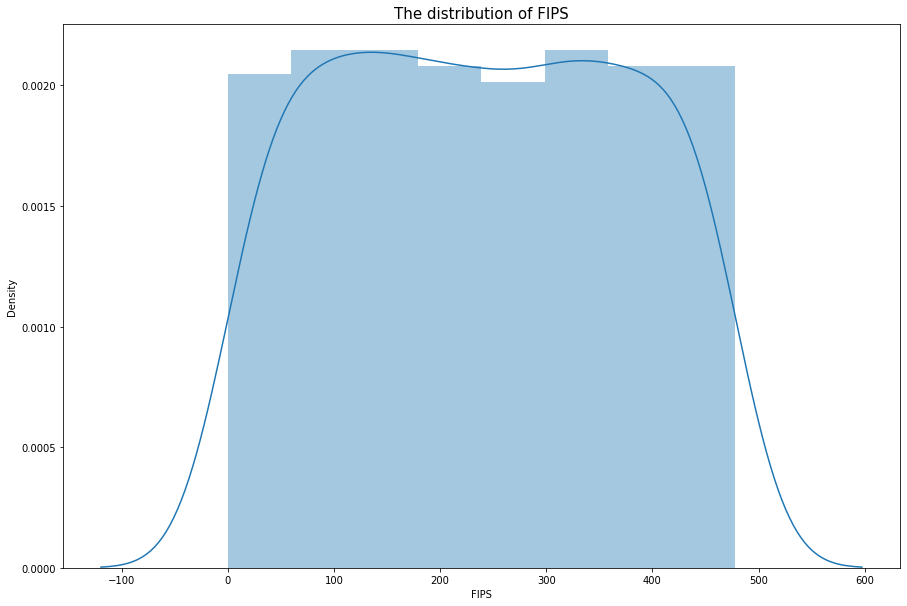

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


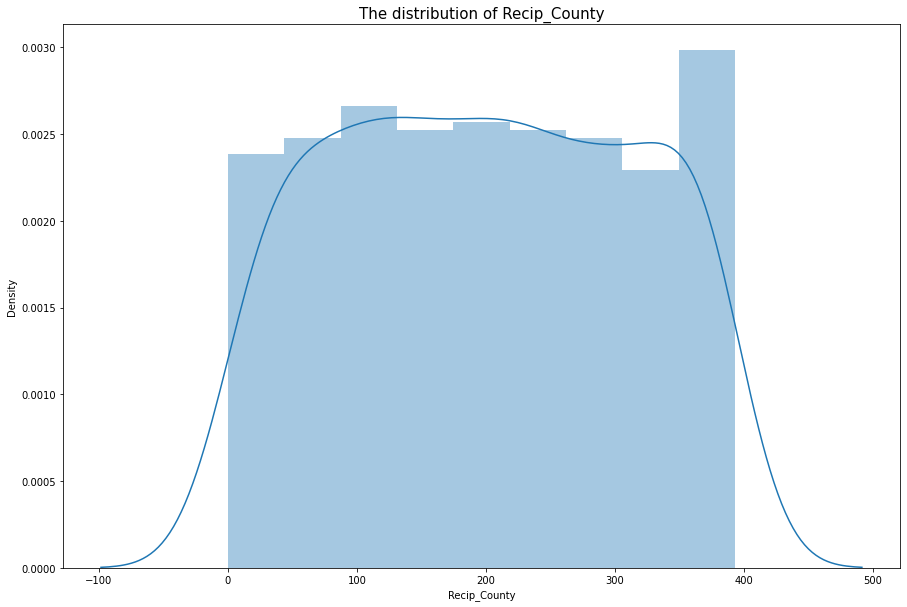

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


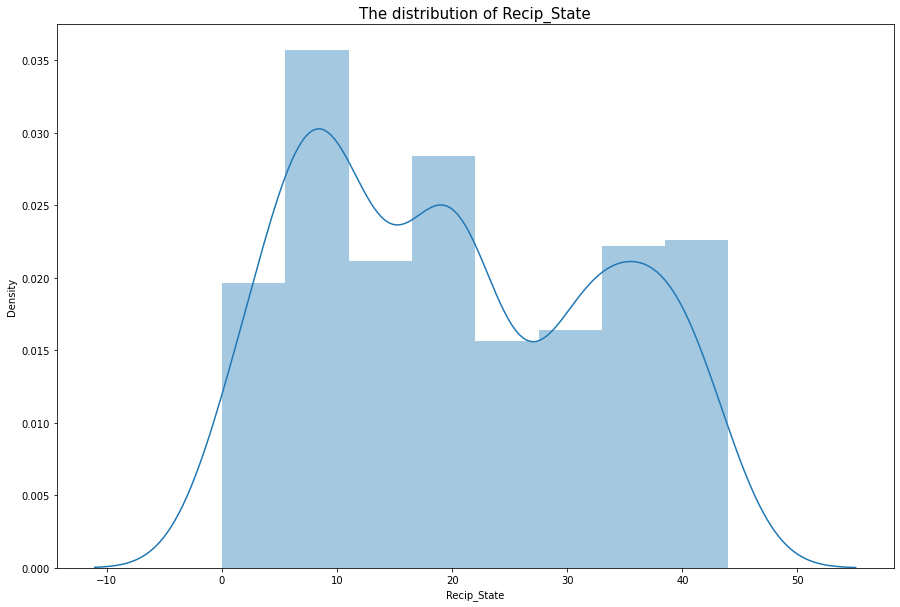

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


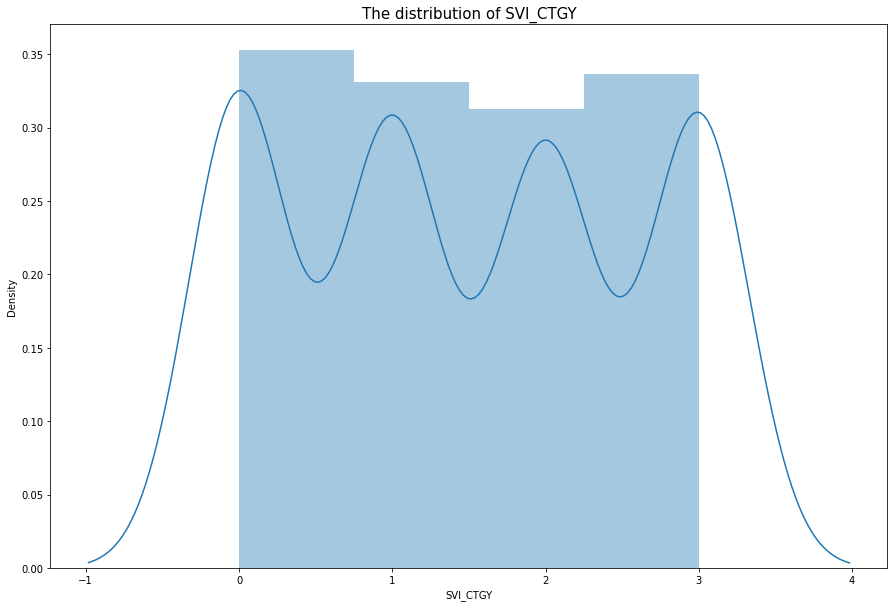

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


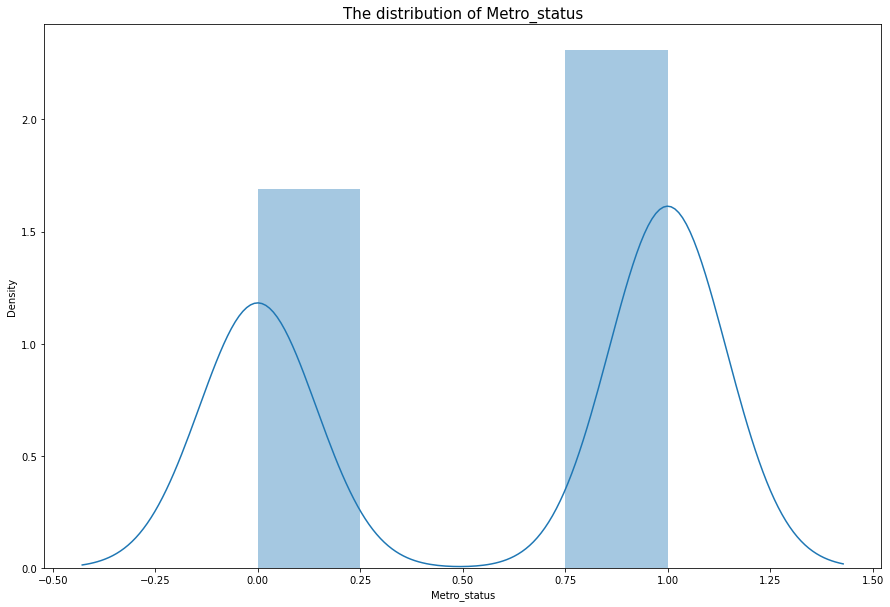

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


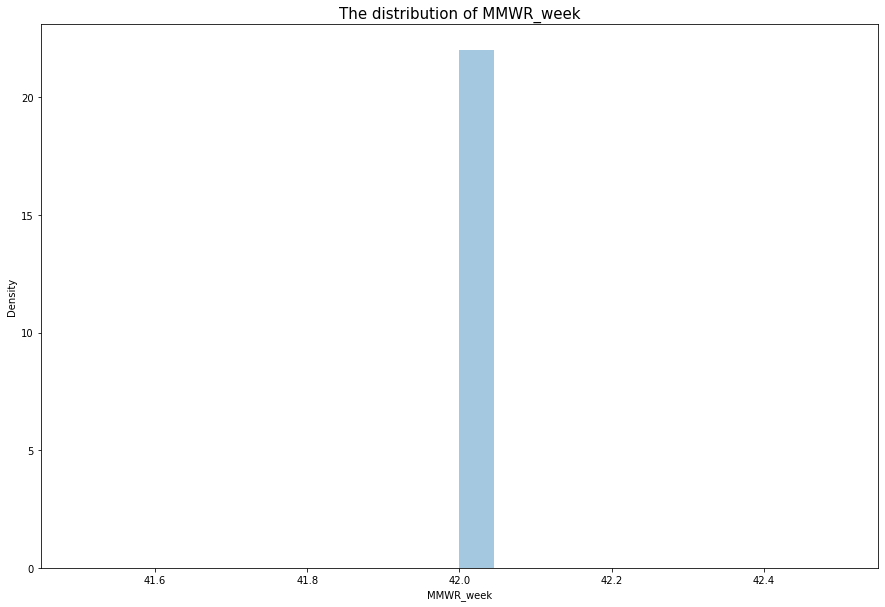

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


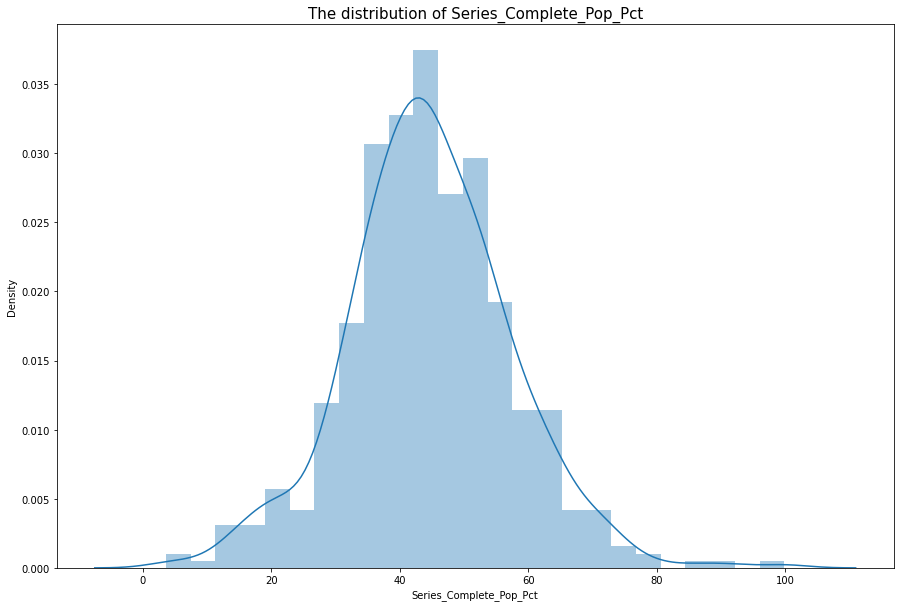

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


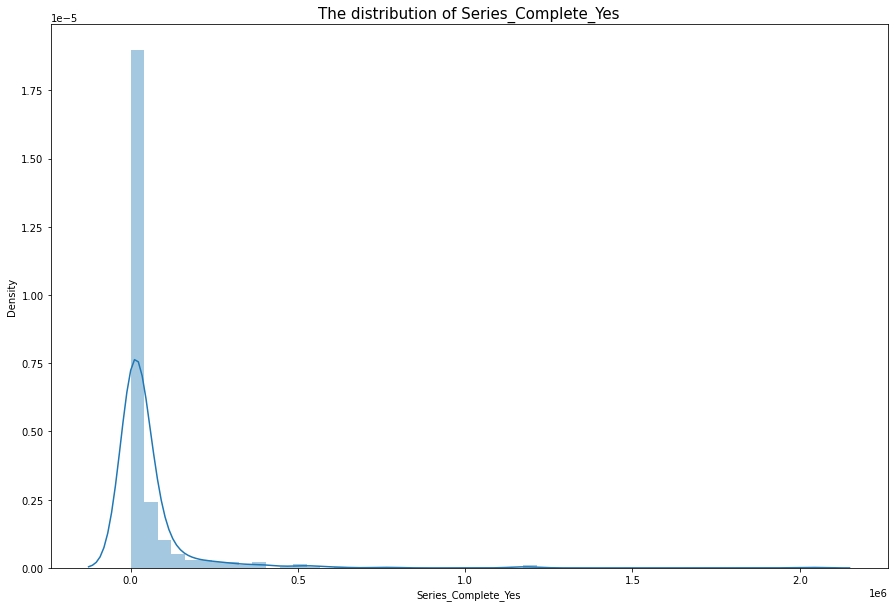

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


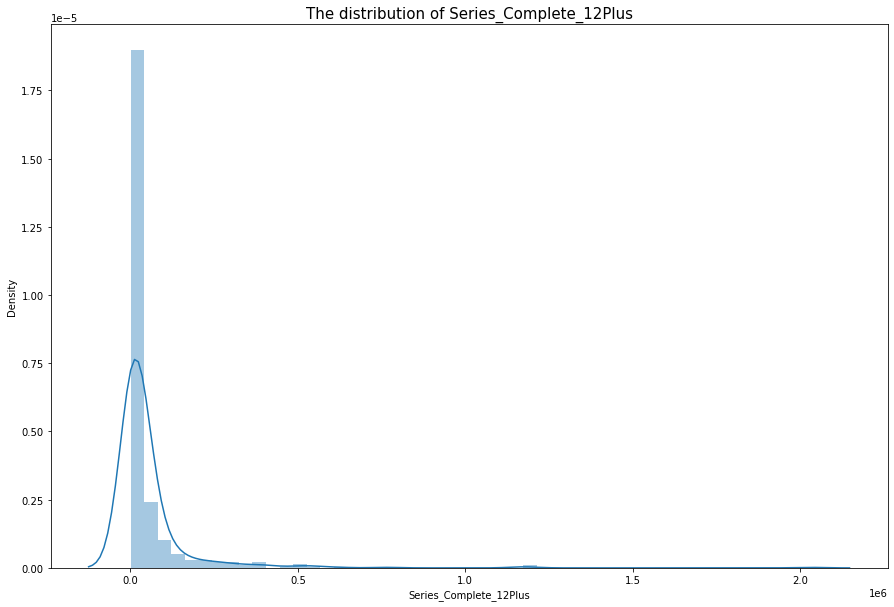

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


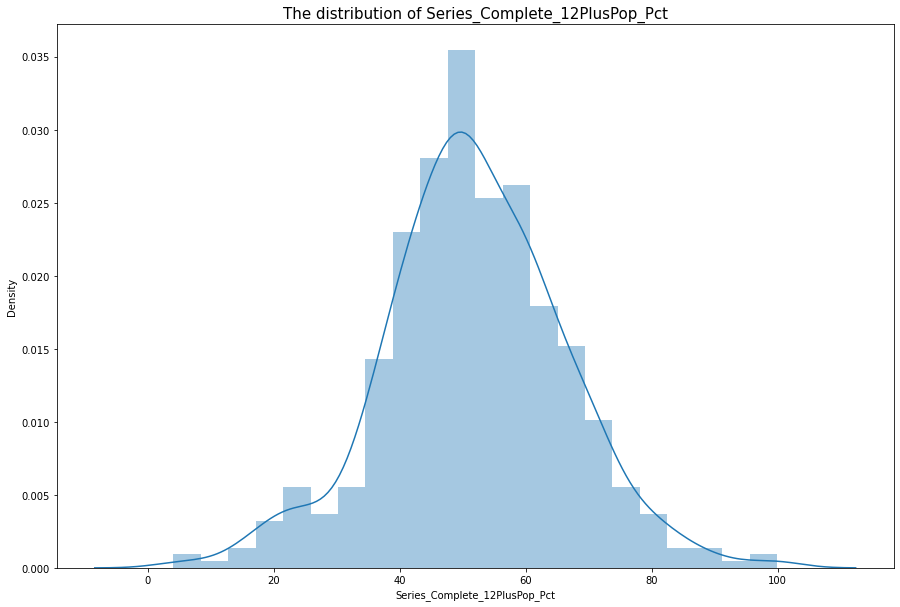

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


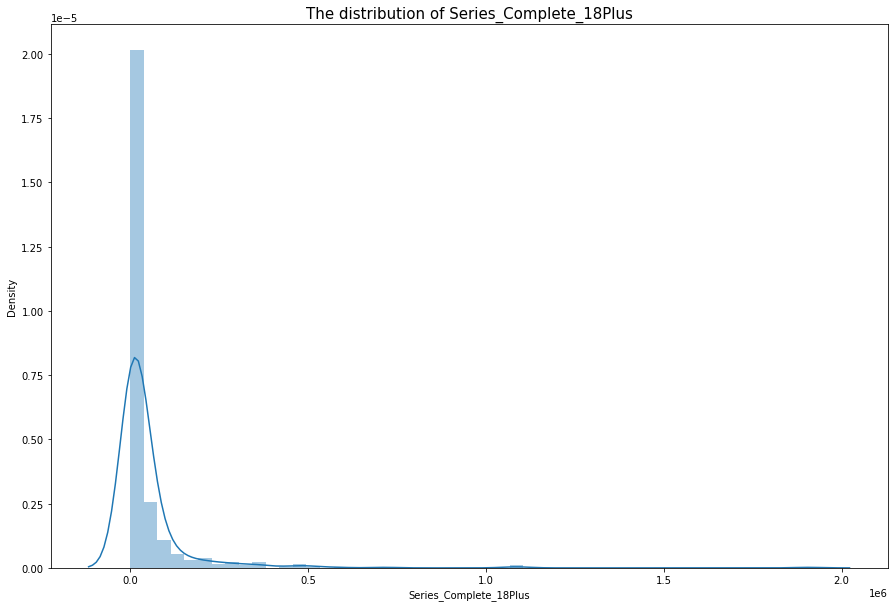

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


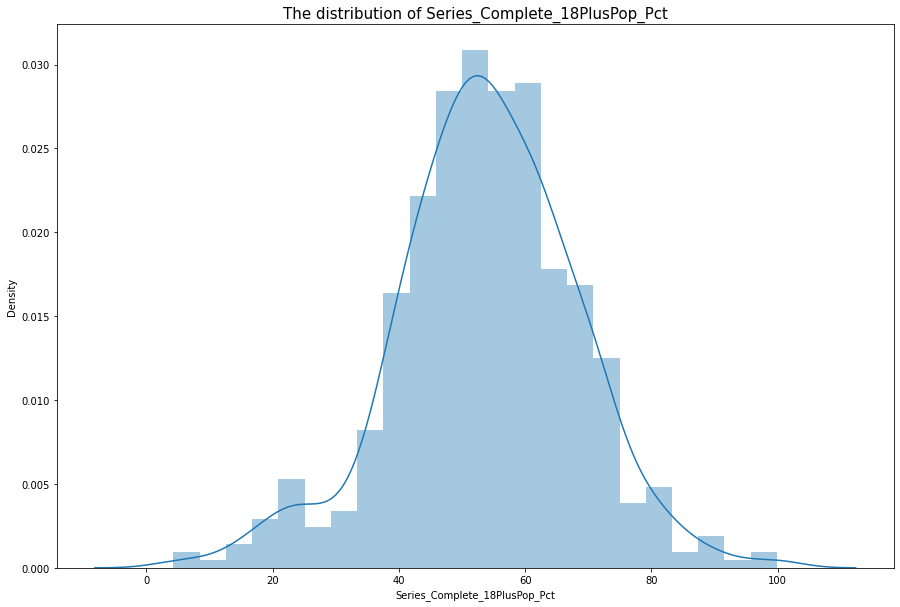

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


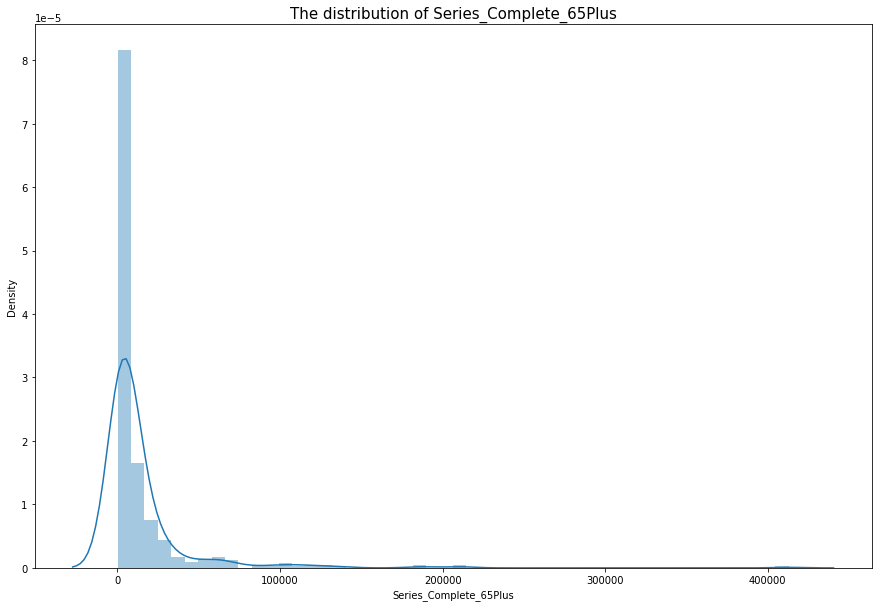

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


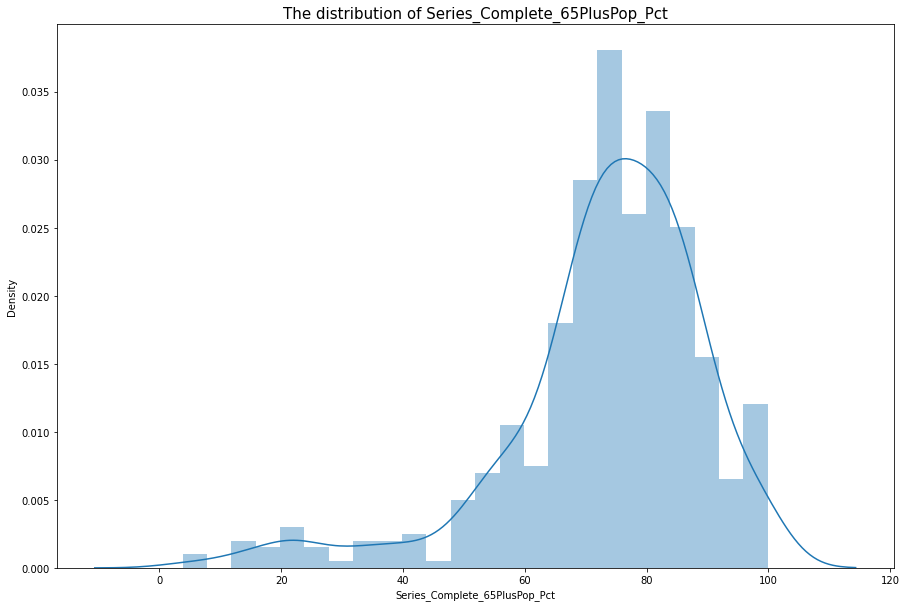

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


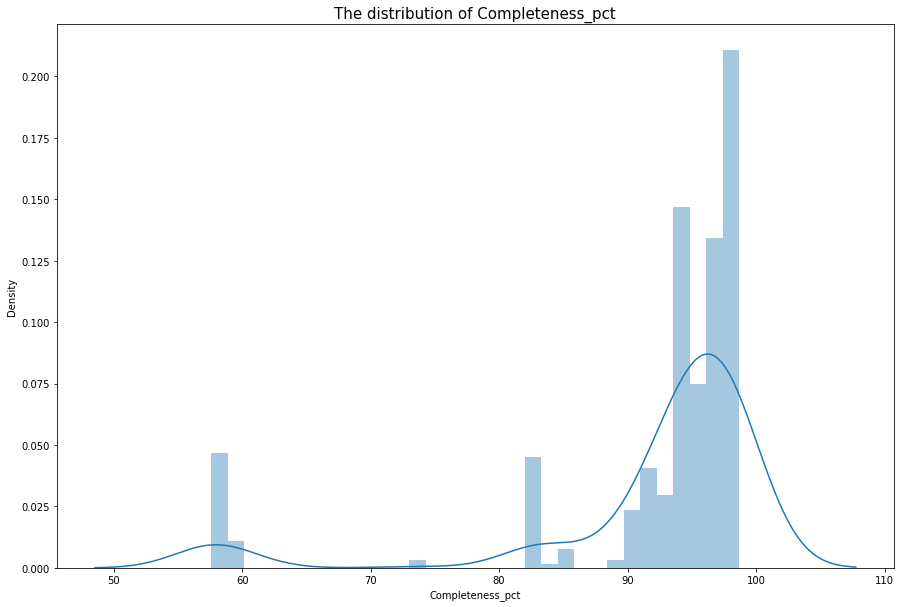

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


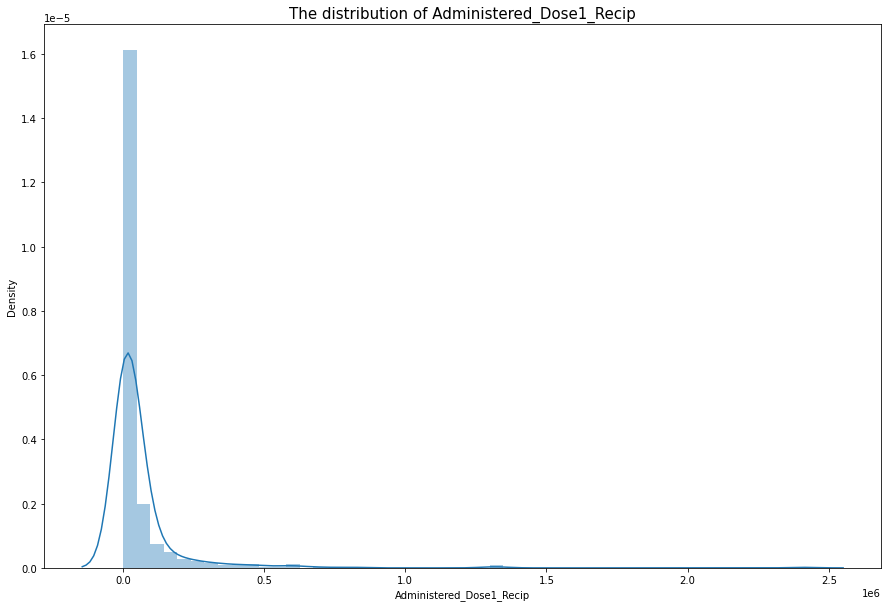

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


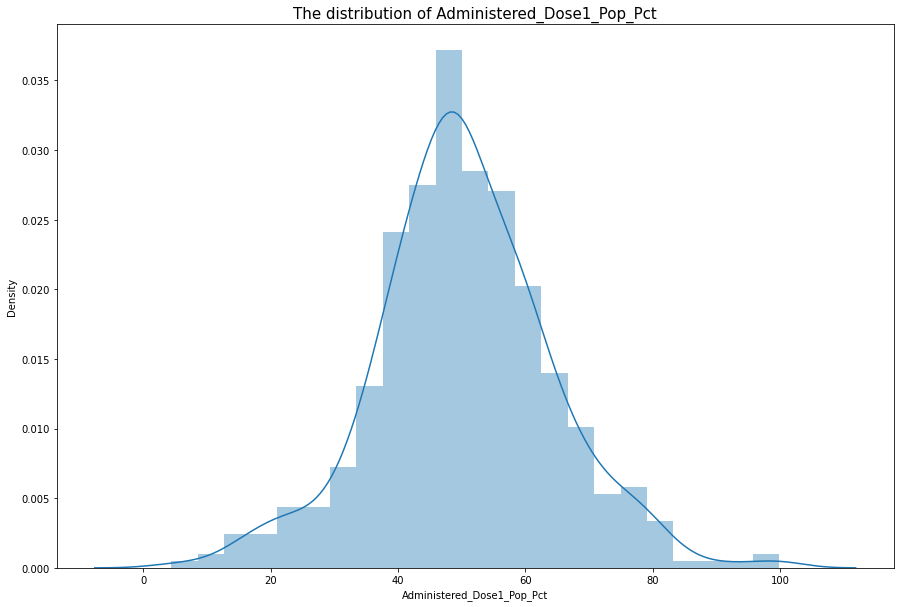

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


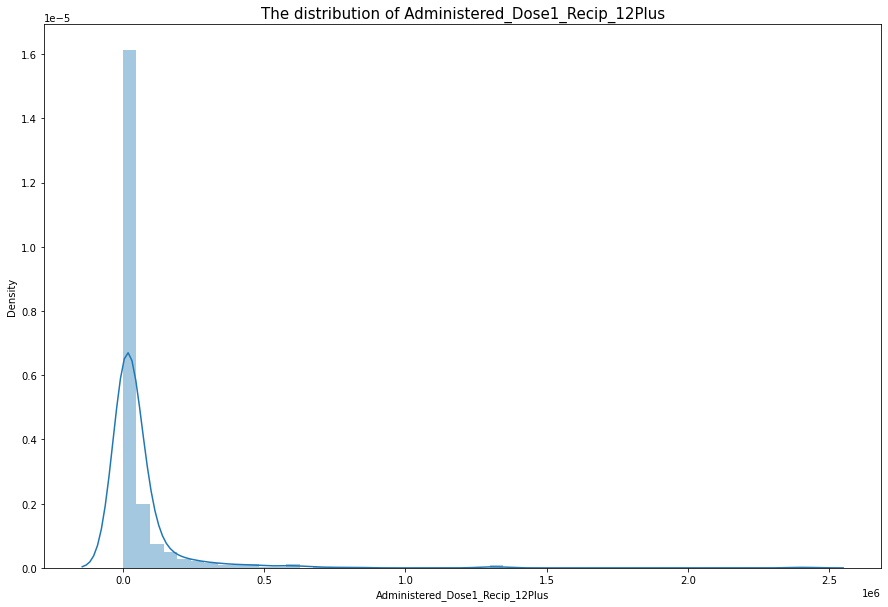

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


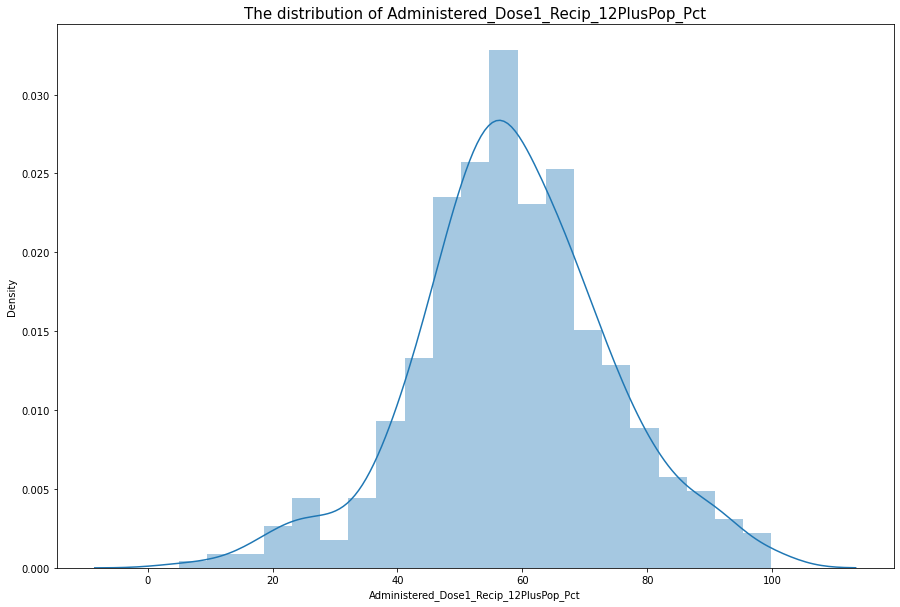

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


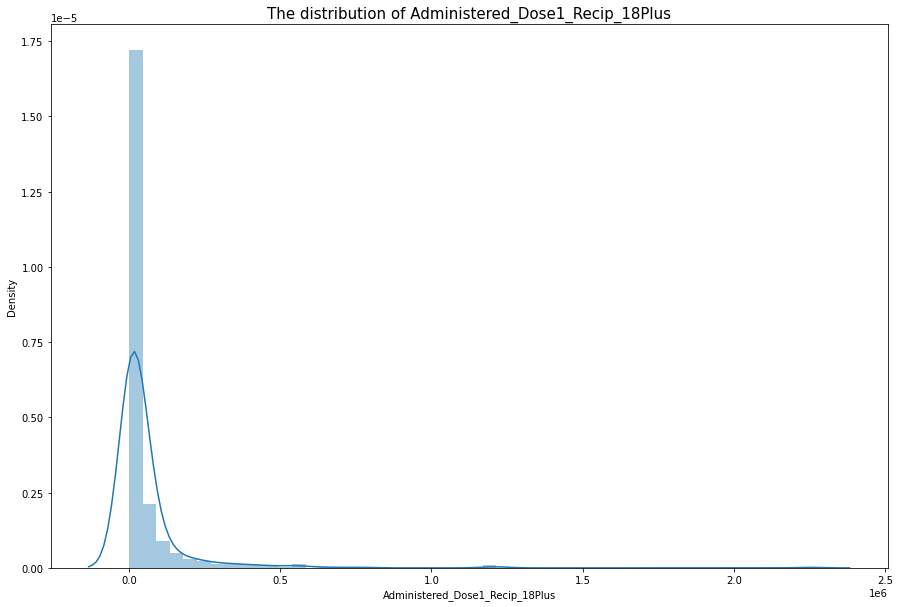

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


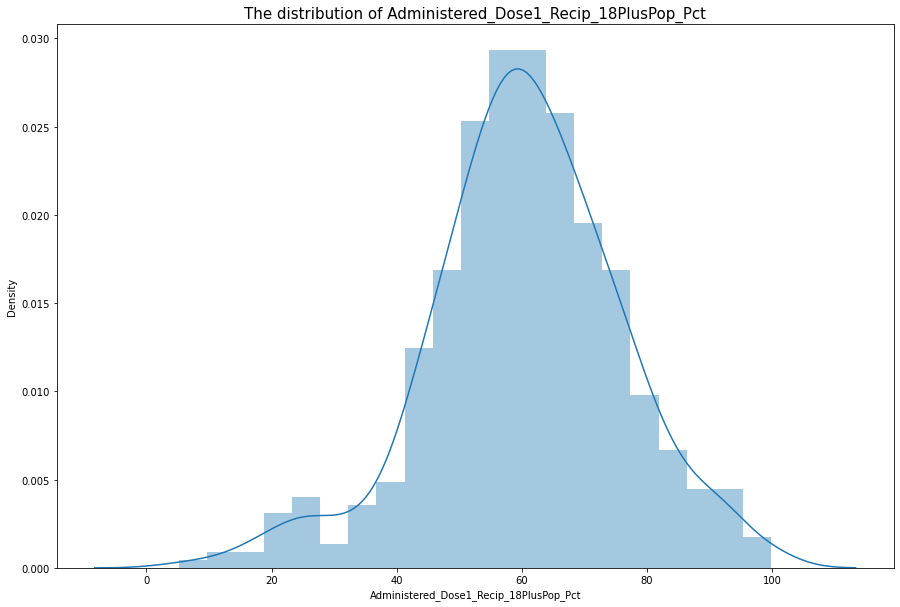

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


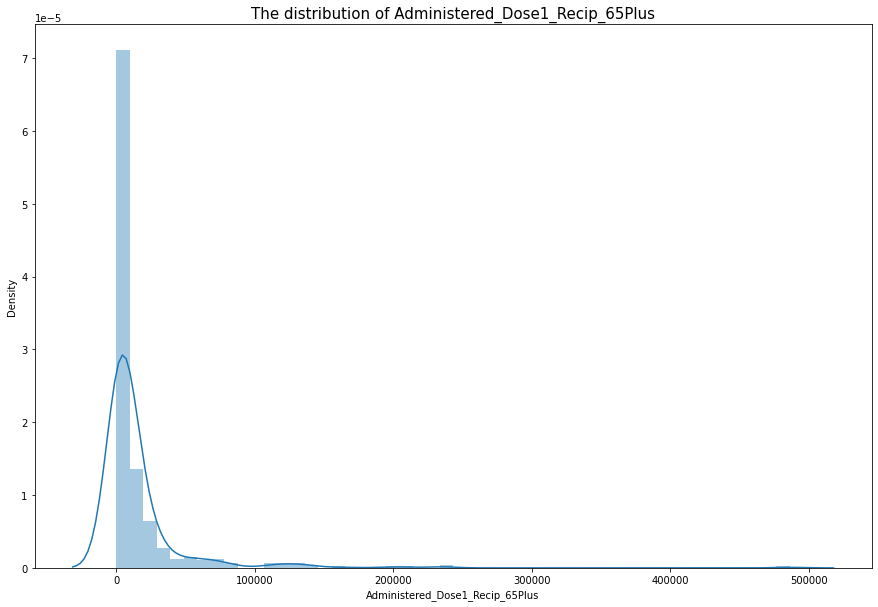

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


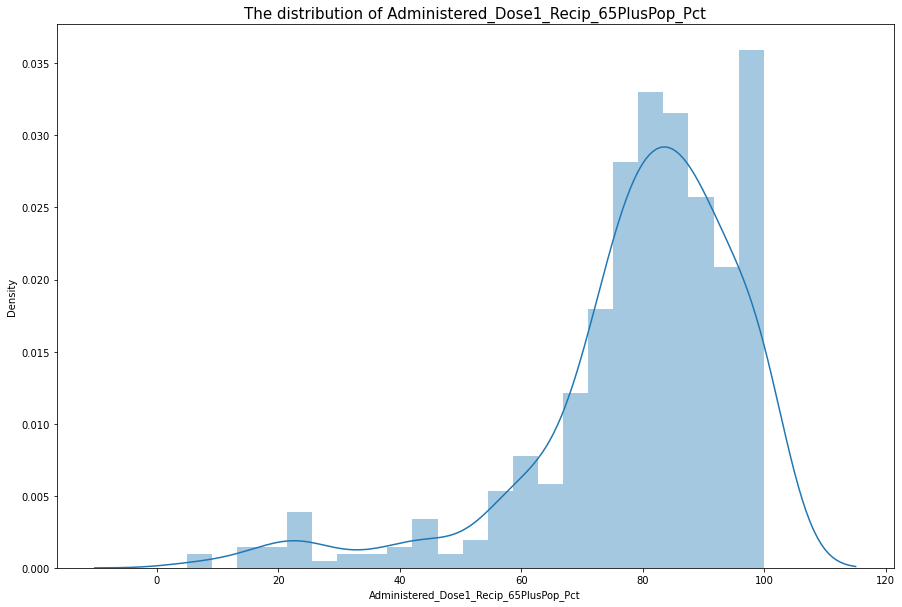

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


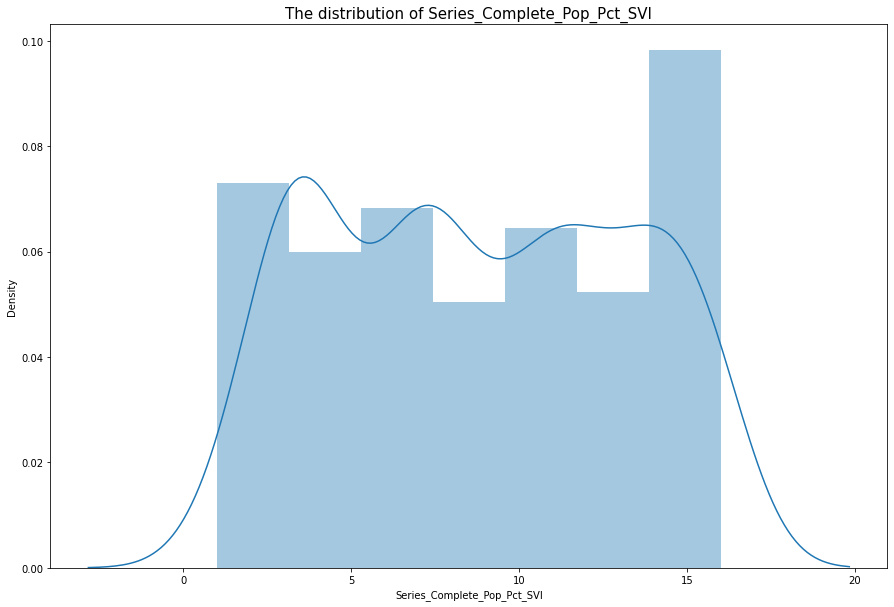

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


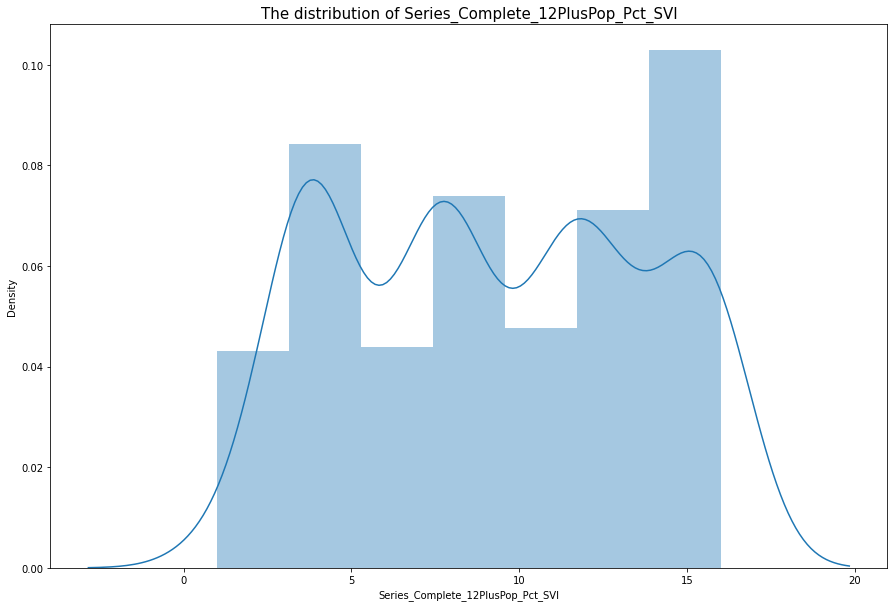

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


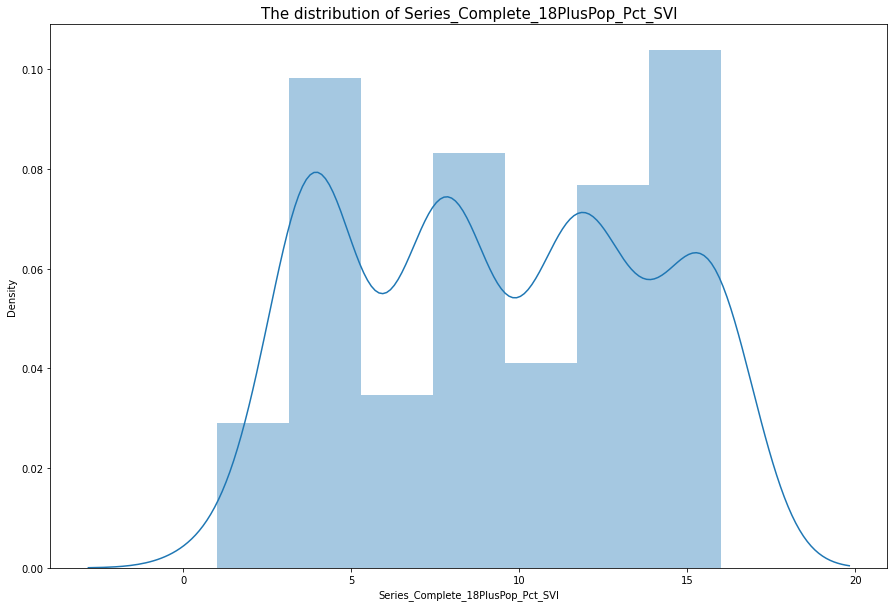

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


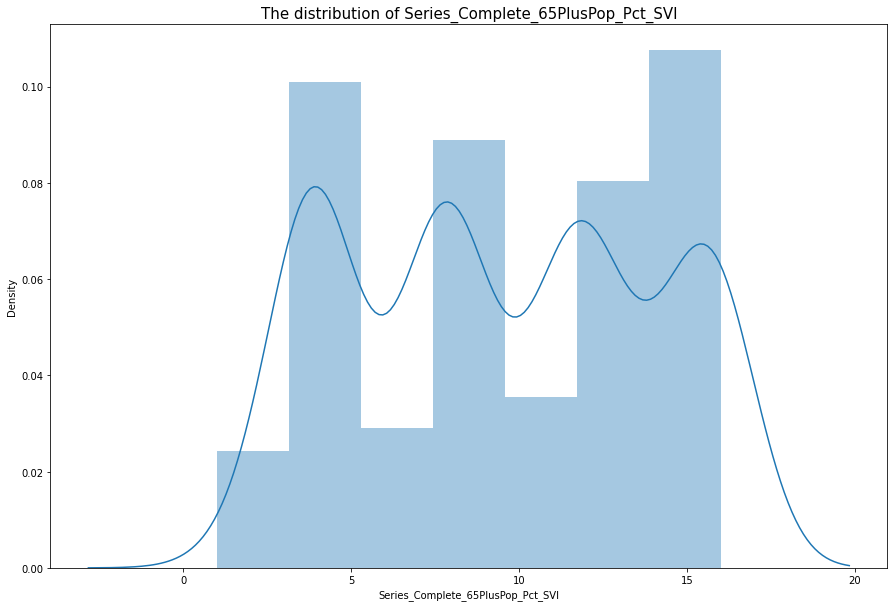

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


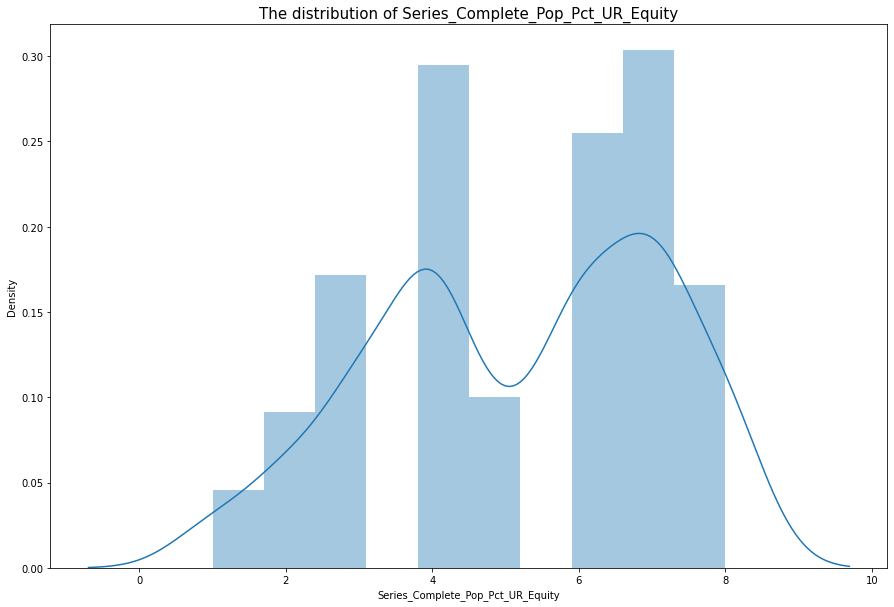

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


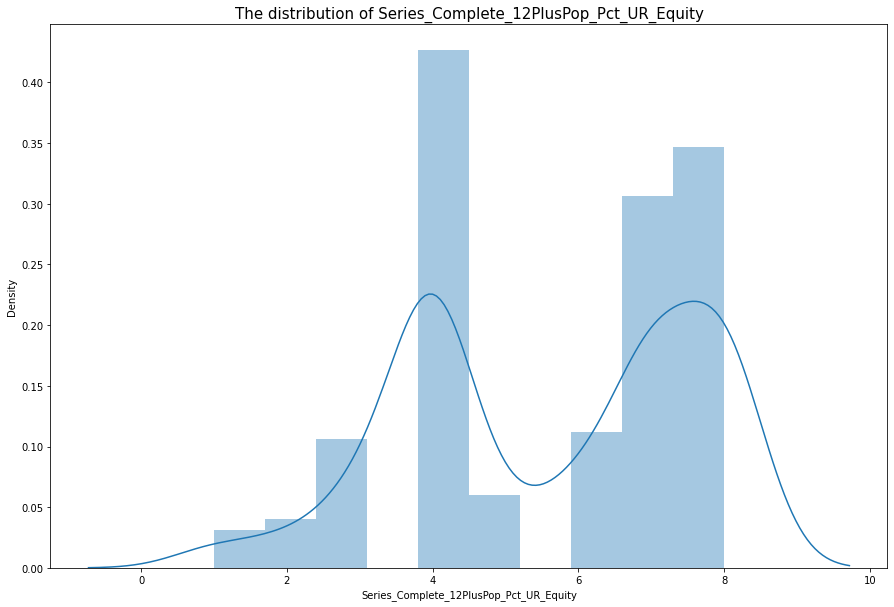

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


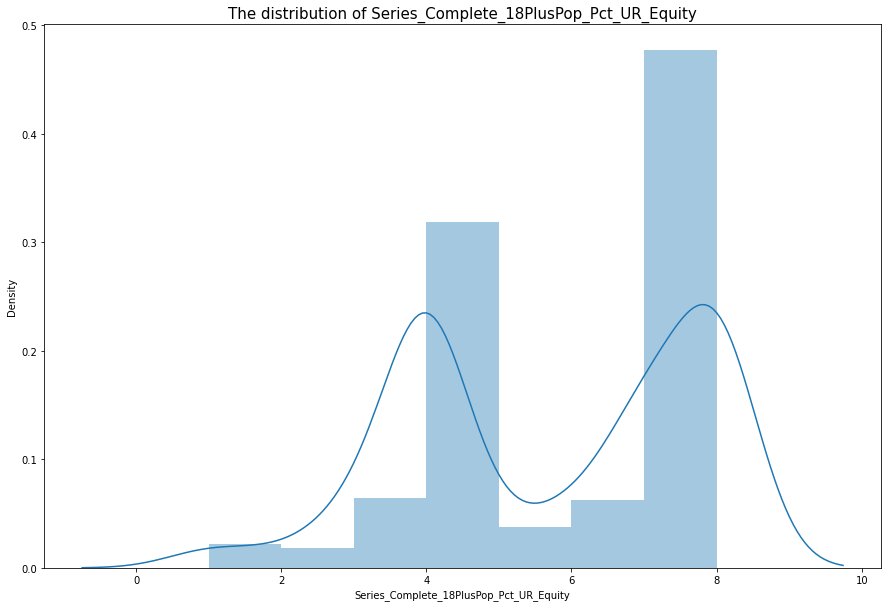

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


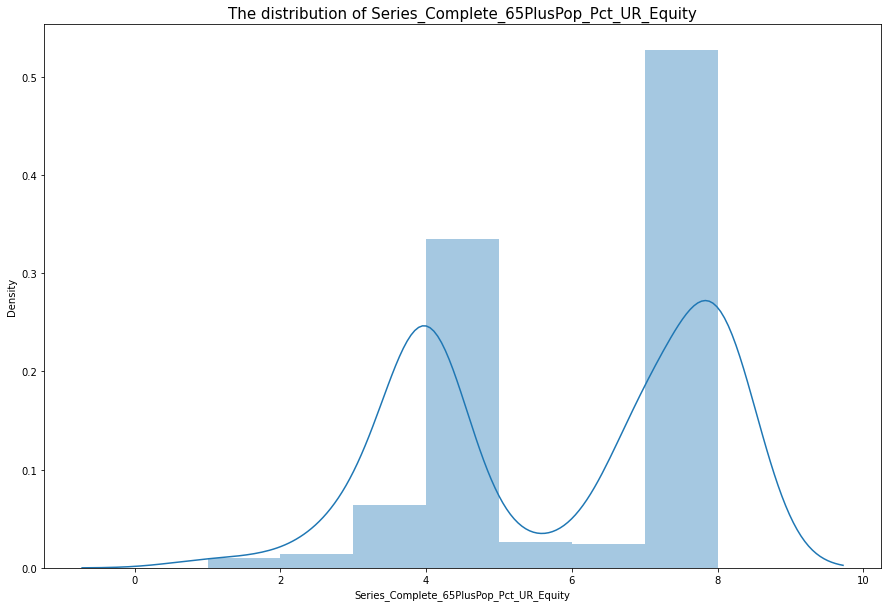

In [ ]:
for col in list(new_data.columns):
  plt.figure(figsize=(15,10))
  plt.title(f'The distribution of {col}',fontsize=15)
  snus.distplot(new_data[col])
  plt.show()

#**3. Matrix of correlation**

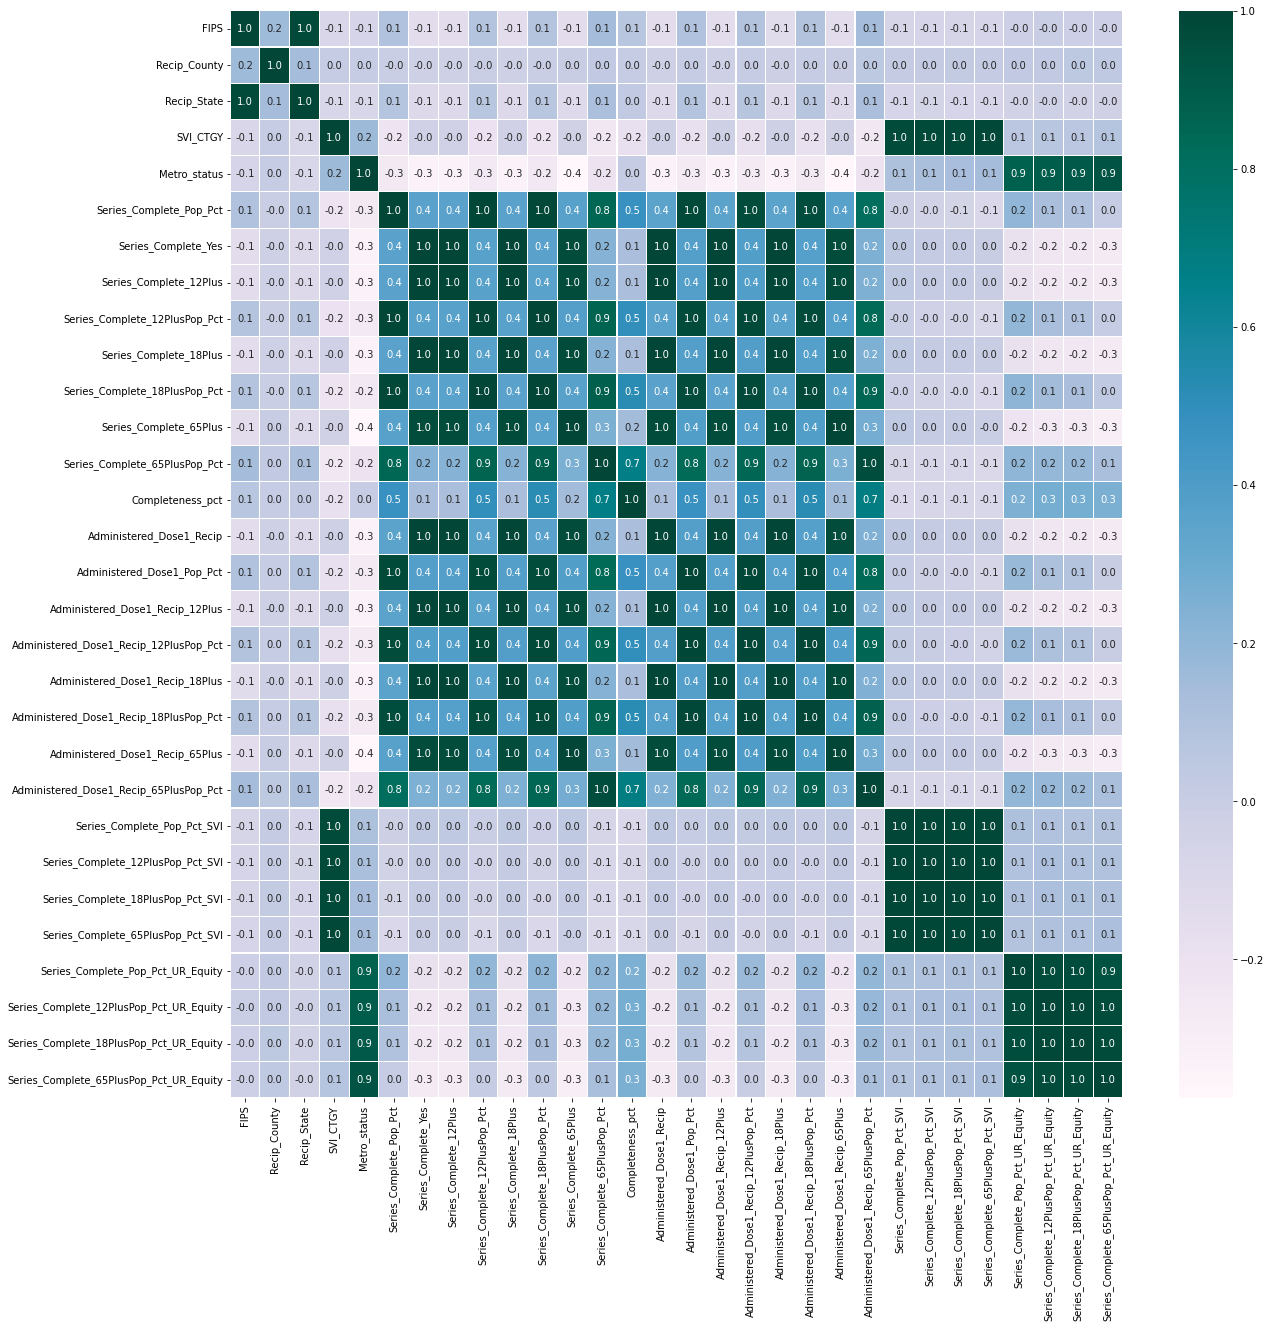

In [ ]:
f,ax = plt.subplots(figsize=(20, 20))
snus.heatmap(new_data.drop('MMWR_week', axis = 1).corr(), annot=True, linewidths=.10, fmt= '.1f',ax=ax, cmap='PuBuGn')
plt.show()

Здесь много сильно коррелированных переменных. А именно очень многие данные являются полной копией остальных

#**4. Scatterplots**

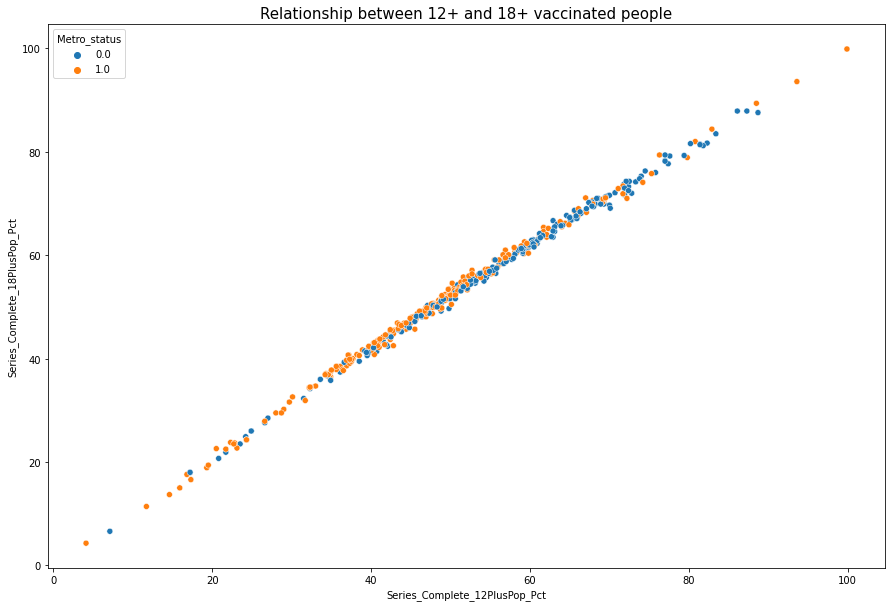

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Relationship between 12+ and 18+ vaccinated people',fontsize=15)
snus.scatterplot(data=new_data, x="Series_Complete_12PlusPop_Pct", y="Series_Complete_18PlusPop_Pct", hue = 'Metro_status')
plt.show()

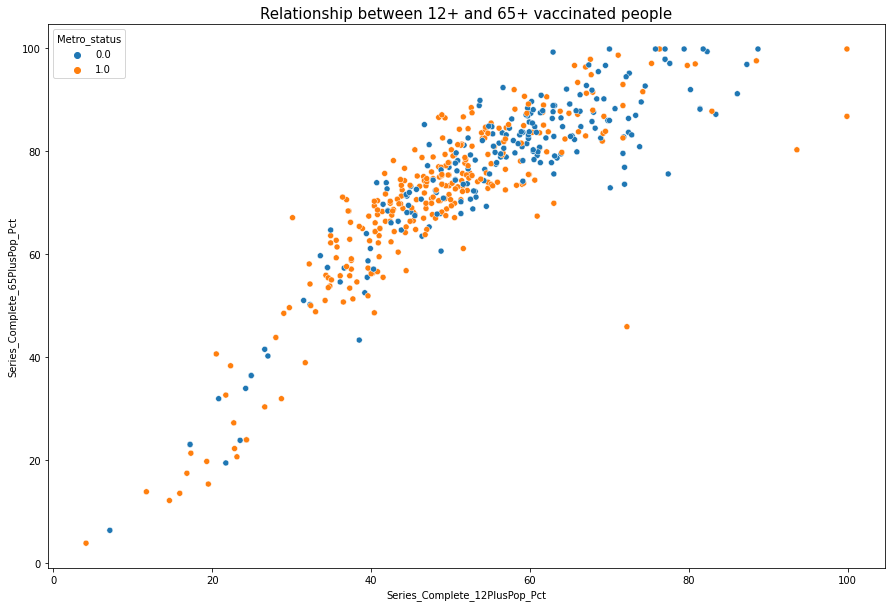

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Relationship between 12+ and 65+ vaccinated people',fontsize=15)
snus.scatterplot(data=new_data, x="Series_Complete_12PlusPop_Pct", y="Series_Complete_65PlusPop_Pct", hue = 'Metro_status')

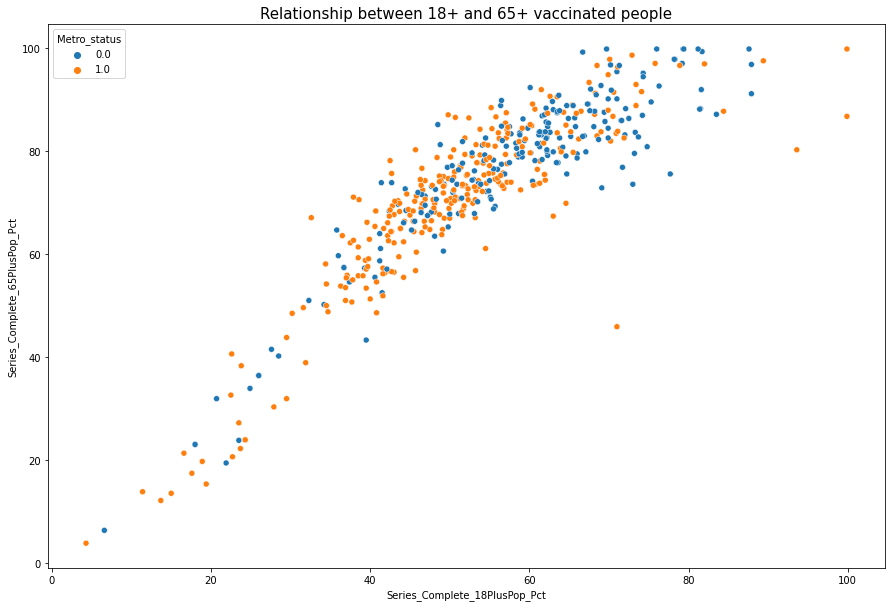

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Relationship between 18+ and 65+ vaccinated people',fontsize=15)
snus.scatterplot(data=new_data, x="Series_Complete_18PlusPop_Pct", y="Series_Complete_65PlusPop_Pct", hue = 'Metro_status')

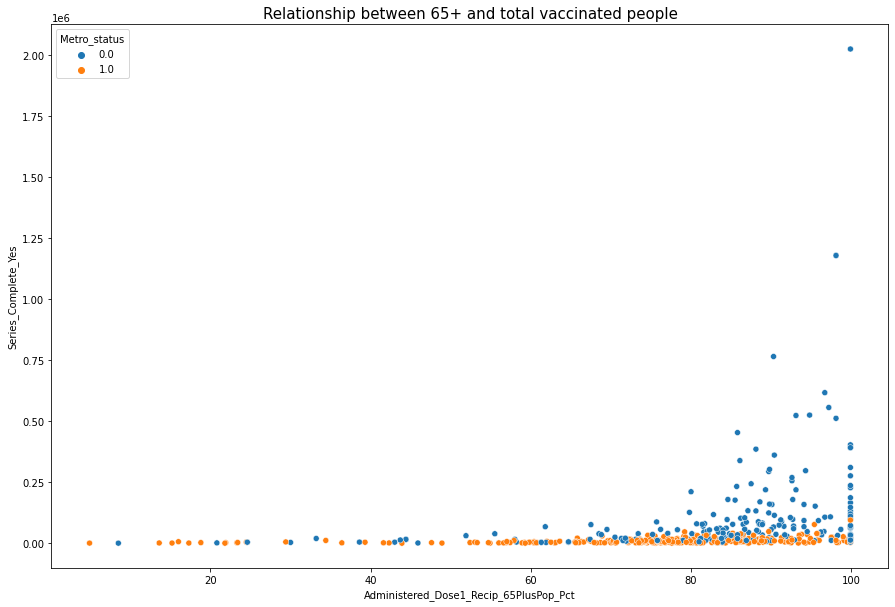

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Relationship between 65+ and total vaccinated people',fontsize=15)
snus.scatterplot(data=new_data, x="Administered_Dose1_Recip_65PlusPop_Pct", y="Series_Complete_Yes", hue = 'Metro_status')

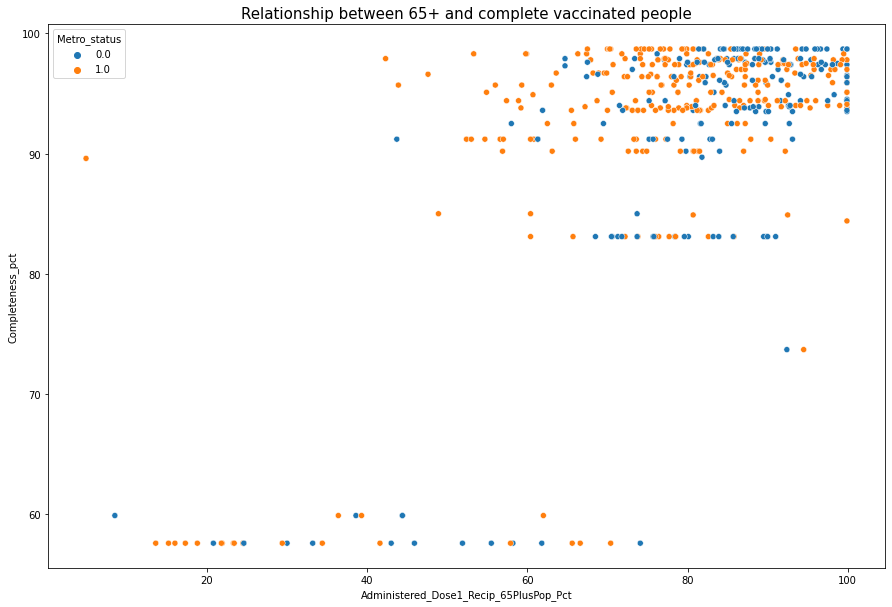

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Relationship between 65+ and complete vaccinated people',fontsize=15)
snus.scatterplot(data=new_data, x="Administered_Dose1_Recip_65PlusPop_Pct", y="Completeness_pct", hue = 'Metro_status')

#**5. Confidence intervals for coefficients**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


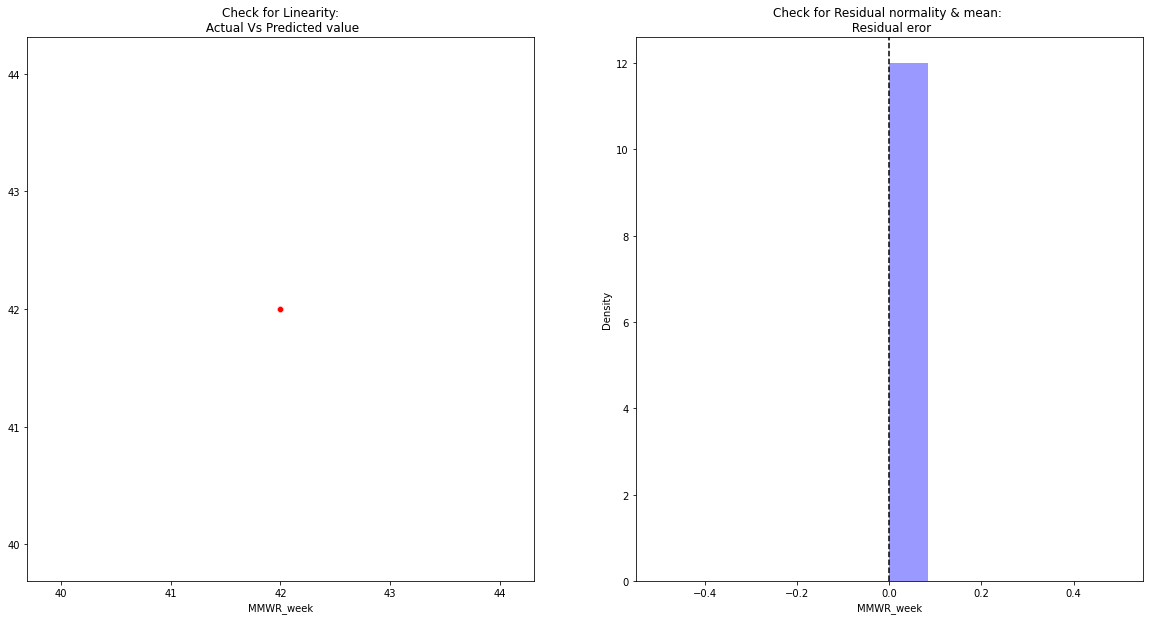

In [ ]:
y_pred_sk = lin_reg.predict(X_test)

# Check for Linearity
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
snus.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
snus.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


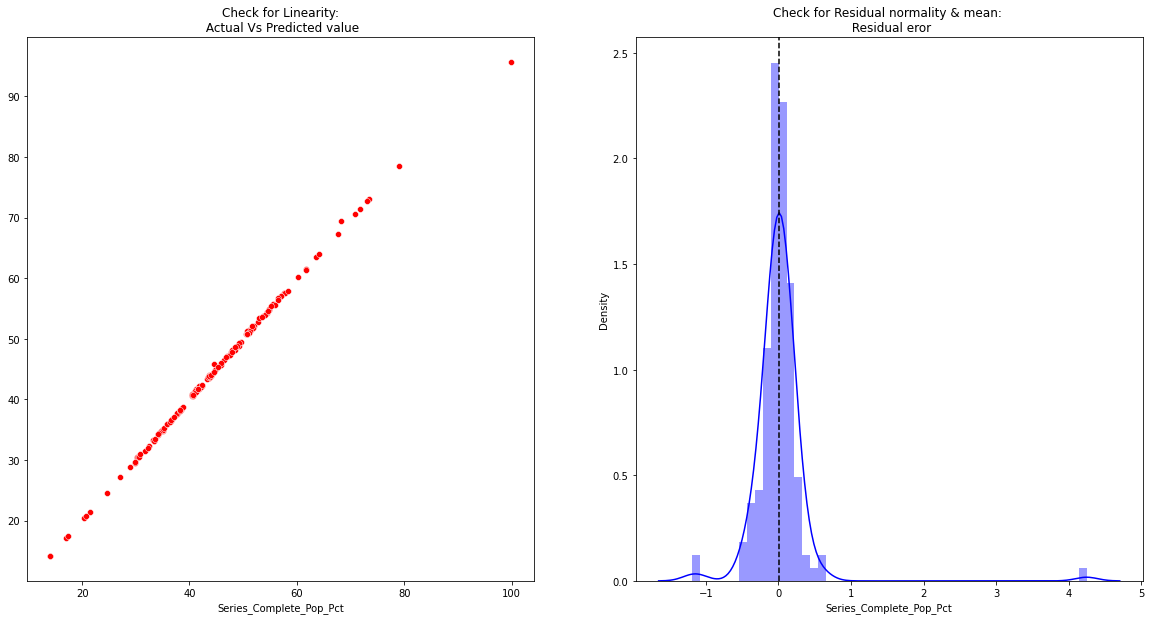

In [ ]:
y_pred_sk = lin_reg_2.predict(X_test_2)

# Check for Linearity
f = plt.figure(figsize=(20,10))
ax = f.add_subplot(121)
snus.scatterplot(y_test_2,y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
snus.distplot((y_test_2 - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test_2 - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

Text(0.5, 1.0, 'Confidence intervals for coefficients')

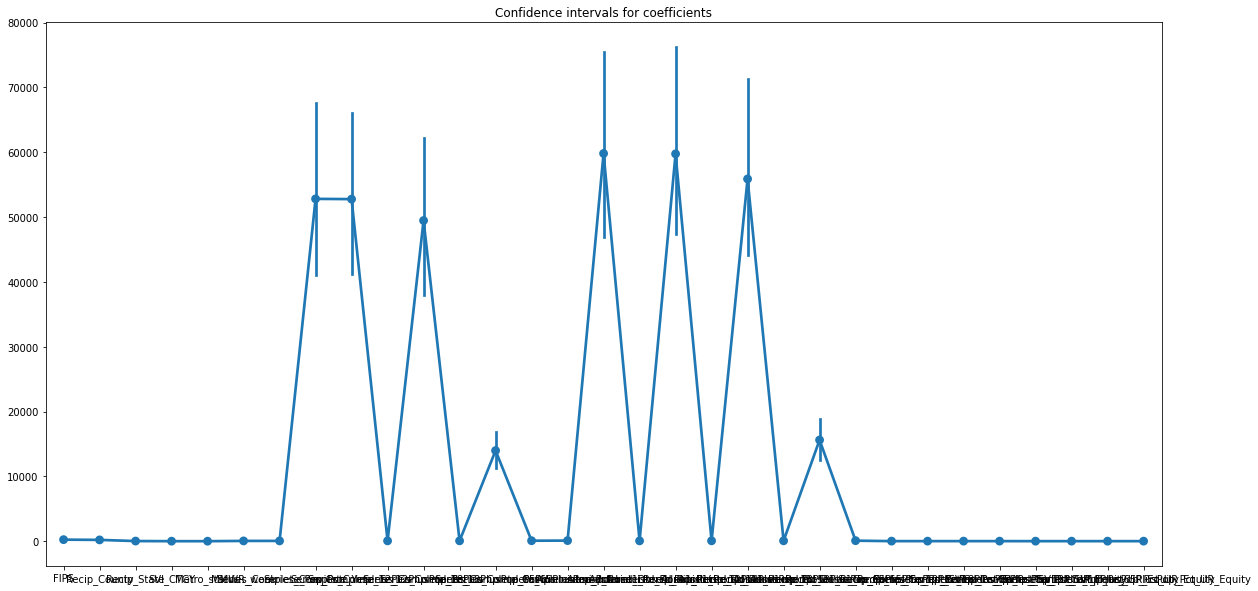

In [ ]:
plt.figure(figsize=(20, 10))
snus.pointplot(data=new_data)
plt.title('Confidence intervals for coefficients')

#**6. Check for Heteroscedasticity**

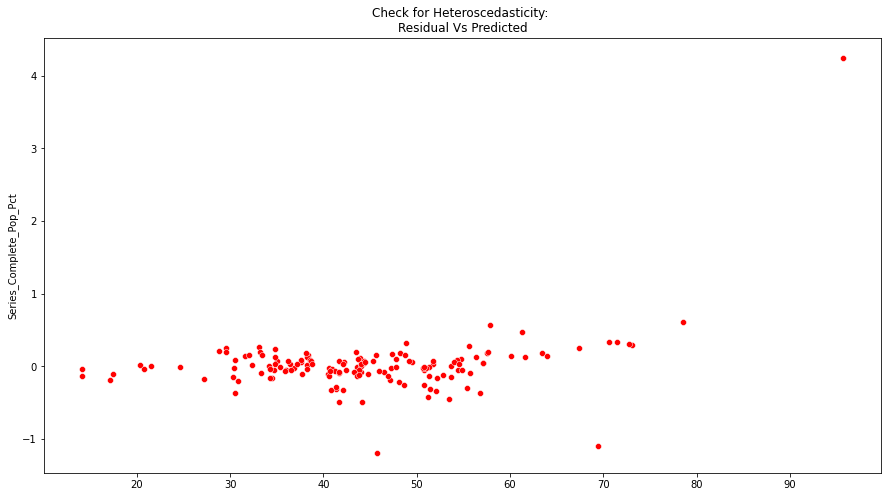

In [ ]:
f,ax = plt.subplots(figsize=(15, 8))

#Check for Homoscedasticity
snus.scatterplot(y = (y_test_2 - y_pred_sk), x= y_pred_sk, ax = ax,color='r') 
ax.set_title('Check for Heteroscedasticity: \nResidual Vs Predicted');

3. The plot is exhibit heteroscedastic, error will insease after certian point.

#**7. Check for Multivariate Normality**

Text(0.5, 1.0, 'Check for Multivariate Normality: \nQ-Q Plot')

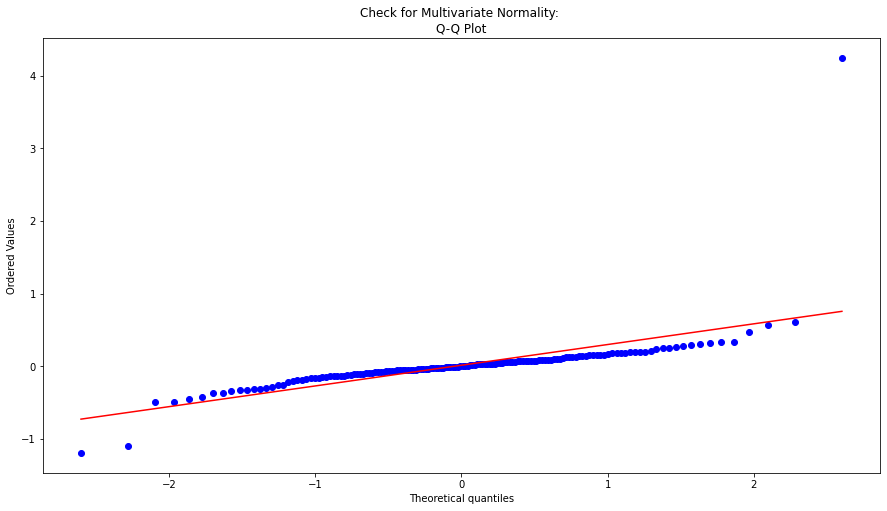

In [ ]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(figsize=(15, 8))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test_2 - y_pred_sk),fit=True,plot=ax)
ax.set_title('Check for Multivariate Normality: \nQ-Q Plot')

In [ ]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- metrics.r2_score(y_test_2, y_pred_sk))
VIF

919.971949035868

The model assumption linear regression as follows

1.   The residual mean is zero and residual error plot right skewed
2.   Q-Q plot shows as value log value greater than 4 trends to increase
4. Variance inflation factor value is greater than 5, so is multicollearity.





#**8. Metrics for linear and non-linear regression**

In [ ]:
X = new_data.drop('Series_Complete_Pop_Pct',axis=1) # Independet variable
y = new_data['Series_Complete_Pop_Pct'] # dependent variable

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,y,test_size=0.3,random_state=23)

In [ ]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_train_2, y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predict_evaluate(lin_reg_2, X_train_2, X_test_2, y_train_2, y_test_2)

Test set evaluation:
_____________________________________
MAE: 0.17902208428543068
MSE: 0.17124488312278077
RMSE: 0.4138174514478344
R2 Square 0.9989130103357521
Train set evaluation:
_____________________________________
MAE: 0.15167988822350703
MSE: 0.08697818243627359
RMSE: 0.29492063752181463
R2 Square 0.9994767794437954


In [ ]:
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

In [ ]:
y_pred_sk = lin_reg_2.predict(X_test_2)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test_2, y_pred_sk) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.179022,0.171245,0.413817,0.998913,0.999356


In [ ]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train_2, y_train_2)

In [ ]:
predict_evaluate(clf, X_train_2, X_test_2, y_train_2, y_test_2)

Test set evaluation:
_____________________________________
MAE: 1.4486666666666668
MSE: 10.250333333333337
RMSE: 3.2016141762138264
R2 Square 0.9349352448654469
Train set evaluation:
_____________________________________
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0


In [ ]:
y_pred_sk_2 = clf.predict(X_test_2)

results_df_2 = pd.DataFrame(data=[["Decision Tree", *evaluate(y_test_2, y_pred_sk_2) , cross_val(clf)]],
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,0.179022,0.171245,0.413817,0.998913,0.999356
1,Decision Tree,1.448667,10.250333,3.201614,0.934935,0.972910


Метрики для линейной регрессии показали лучшие значения, чем для решающего дерева